# 1d acoustic wave on a string test case

This notebook documents the process of developing a 1d string system with motion governed by the acoustic wave equation. We will use a pair of homogeneous Dirichlet boundary conditions as well as initial conditions for the position and velocity. The system is set up as follows:

$$
\frac{\partial^2 u(x,t)}{\partial t^2} = c^2 \frac{\partial^2 u(x,t)}{\partial x^2}, \quad x \in [-L, L], \, t > 0
$$

**Boundary conditions:**

$$
u(-L, t) = 0, \quad u(L, t) = 0
$$

**Initial conditions:**

$$
u(x, 0) = \sin(\frac{2 \pi  x}{L}), \quad u_{t}(x, 0) = 0
$$




In [2]:
# import modules
import numpy as np
import matplotlib.pyplot as plt

### First implementation of wave equation analytical solution 

We solve the above system for a domain length $L$ = 1000m, $c$ = 1000 m/s and with $n$ = 2 come to the following solution for a travelling wave: $ u(x, t) = \frac{1}{2} \sin(\frac{n \pi (x - 2000 t)}{1000}) $

Below we plot the initial position of the wave alongside the solution at different time steps, note that this system has a period of 0.5s

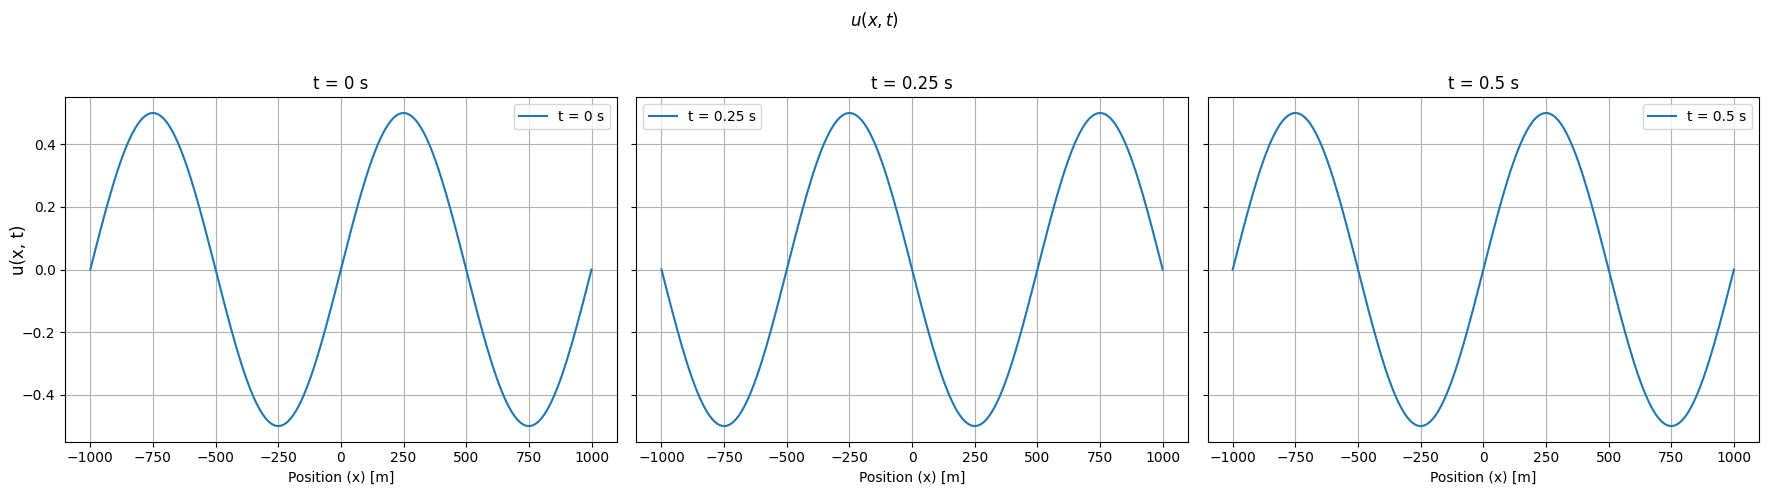

In [3]:
# define constants
L = 1000          # domain length (m)
c = 2000          # wave speed (m/s)
t_values = [0, 0.25, 0.5]  # time steps for individual plots
x = np.linspace(-L, L, 201)      # spatial domain
A2 = 0.5          # amplitude coefficient
n = 2             # harmonic number

# define initial condition 
def initial_condition(x, L):
    return np.sin(np.pi * x / 500)

# define analytical solution 
def u(x, t, L, c, A2=0.5, n=2):
    return A2 * np.sin((n * np.pi * (x - c * t)) / L)


# set up the figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# plot the wave solution at each specified time step in side-by-side subplots
for i, t in enumerate(t_values):
    axs[i].plot(x, u(x, t, L, c, A2, n), label=f"t = {t} s")
    axs[i].set_xlabel("Position (x) [m]")
    axs[i].set_title(f"t = {t} s")
    axs[i].legend()
    axs[i].grid(True)

# set the y-axis label for the entire figure
fig.supylabel("u(x, t)")
fig.suptitle("$u(x, t)$")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
